# battle plan

## rebuild RPG2k3 systems in `elm-engine`

- <span style="color:green">[**easy**]</span> render map with WebGL 

- <span style="color:green">[**easy**]</span> input, navigation 
  - <span style="color:gray">[**???**]</span> world tree
  
- <span style="color:red">[**hard**]</span> event system
  - global environment
  - embedded scripting, expose Elm functions

- <span style="color:red">[**hard**]</span> implement events
  - load map files
  - translate `Event`, `EventCommand`
  - message
  - choices
  - set!
  - time elapsed
  - change state: inventory, etc (callbacks on failure?)
- <span style="color:red">[**also hard**]</span> animated events
    - 

- <span style="color:red">[**hard**]</span> graphic effects
  - color saturation
  - distort (vertex buffer?)
  - shader combinators?

## better tools

- `lister`: console, editing, custom views
- `timeline`: message stream, scroll through scenes 
- plot tree? 

# engine types

```elm
type alias Model = 
  { entities : List Entity
  , commands : List (Tree Parallel|Serial Command)
    -- Branch Parallel|Serial (List (Tree Command)) | Leaf Command
  , clock : Clock -- (wall time, game time, tick ratio)
  , state : State -- (Dialog, Menu, Battle, Map)
  , render : RenderOptions 
  , resources : Collection XML (Texture, etc)
  , seed : RandomSeed
  , gamepad : Gamepad -- {up: Bool, down, A, B, X, Y etc}
  }


type Entity =
  Entity
  { position : Maybe Vec2
  , orientation : Maybe Vec2
  , animation : Maybe (Animation Entity)
  , event : Maybe (Event Entity)
  , sprite : Maybe Sprite
  , inventory : Maybe Inventory
  }


type Message 
  = AddCommand CommandTree -- could also track these 
  | Input GamePadPress
  | Elapsed AnimationFrame
  | ListerMsg Lister.Message


```

###### how to tackle animation?

`{animation: AnimationState -> Time -> Object -> Object}`

where Object has only relevant fields (e.g., position, orientation, sprite angle)
might need option to chain/combine animations

sequential commands?
could load commands into a global pipeline (after marking with event ID)
tree of commands, lists marked Parallel or Serial. maybe some dummy events to coordinate. 

global transitions?
- dialog, menu, battle
- top level union type, view dispatches w/ case statement
- top level clock (wall time, game time, tick ratio)



### lister resources

https://gribouille.github.io/demos/elm-treeview/latest/

In [35]:
get_ipython().magic(u'load_ext autoreload')
get_ipython().magic(u'autoreload 2')

In [10]:
from lxml import etree
from bs4 import BeautifulSoup

In [12]:
f = 'C:Documents/EasyRPG-Editor/Demo/Map0002.emu'
soup = BeautifulSoup(open(f, 'r').read())
events = soup.find_all('event', id='0001')

In [39]:
import tools

tools.pad_chipsets()

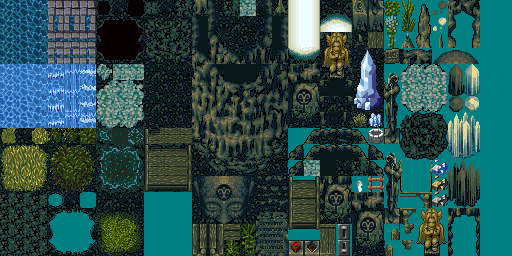

In [26]:
f = '../resources/ChipSet/cave15.png'
pad_image(f)